In [1]:
from scipy import stats
import numpy as np
from sklearn import linear_model, svm
import matplotlib.pyplot as plt
import pandas as pd


X= np.loadtxt(open("../100_final_data.csv", "rb"), delimiter=",", skiprows=1, usecols=range(1,94) )
X = X.transpose()
X = stats.zscore(X)
y = np.loadtxt(open("../all_data.csv", "rb"), delimiter=",", skiprows=1, usecols=range(1,94))
y = y[0,:]

In [2]:
features = np.loadtxt(open("../final_data.csv", "rb"), dtype=str, delimiter=",", skiprows=1, usecols=0)

In [3]:
svm = svm.SVC(kernel='linear')
logistic = linear_model.LogisticRegression(C=1e5)

svm_weights = svm.fit(X, y).coef_[0]
log_weights = logistic.fit(X, y).coef_[0]

In [4]:
abs_svm_weights = np.absolute(svm_weights)
abs_log_weights = np.absolute(log_weights)
svm_srtd_ix = np.argsort(abs_svm_weights)
log_srtd_ix = np.argsort(abs_log_weights)

In [5]:
srtd_array = []
for i in log_srtd_ix:
    line = [[features[i], log_weights[i]]]
    srtd_array = srtd_array + line
srtd_array = np.array(srtd_array)

In [6]:
print(srtd_array[-10:,:])

[['1_count_volumeadj_1587' '-1.71278366544']
 ['1_count_volumeadj_214' '-1.7541839981']
 ['1_length_1895' '1.78635840639']
 ['1_length_4763' '1.94279632165']
 ['rh_S_oc_sup_and_transversal_thickness' '-1.95676496592']
 ['1_length_3666' '-2.01870160276']
 ['1_count_volumeadj_3079' '-2.06835771595']
 ['1_length_718' '-2.14795373387']
 ['1_length_486' '2.16803227515']
 ['1_count_volumeadj_3324' '-2.23243500474']]


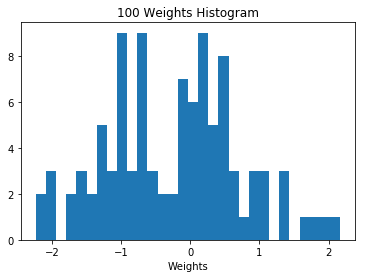

In [7]:
x = srtd_array[:,1].astype(float)
n, bins, patches = plt.hist(x, 30)
plt.xlabel('Weights')
plt.title('100 Weights Histogram')
plt.savefig('100_hist_weights.eps')
plt.show()

In [8]:
from scipy import stats
import numpy as np
from sklearn import linear_model, svm
import matplotlib.pyplot as plt
import pandas as pd


X= np.loadtxt(open("../final_data.csv", "rb"), delimiter=",", skiprows=1, usecols=range(1,94) )
X = X.transpose()
X = stats.zscore(X)
y = np.loadtxt(open("../all_data.csv", "rb"), delimiter=",", skiprows=1, usecols=range(1,94))
y = y[0,:]
features = np.loadtxt(open("../final_data.csv", "rb"), dtype=str, delimiter=",", skiprows=1, usecols=0)

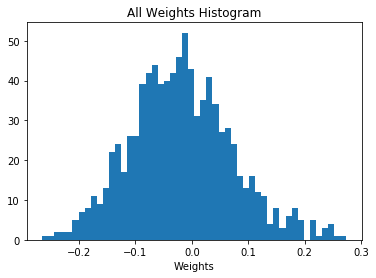

In [10]:
logistic = linear_model.LogisticRegression(C=1e5)
log_weights = logistic.fit(X, y).coef_[0]
abs_log_weights = np.absolute(log_weights)
log_srtd_ix = np.argsort(abs_log_weights)
srtd_array = []
for i in log_srtd_ix:
    line = [[features[i], log_weights[i]]]
    srtd_array = srtd_array + line
srtd_array = np.array(srtd_array)

x = srtd_array[:,1].astype(float)
n, bins, patches = plt.hist(x, 50)
plt.xlabel('Weights')
plt.title('All Weights Histogram')
plt.savefig('all_hist_weights.eps')
plt.show()